# Logistic Regression – Breast Cancer Detection

In this project, we build a Logistic Regression model to classify breast cancer tumors as benign or malignant using a properly preprocessed dataset.

# Importing the libraries

In [87]:
# Importing core libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt

# Sklearn utilities
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib.colors import ListedColormap

# Importing the dataset

We load the dataset and separate features (X) from the target variable (y).

In [88]:
# Load dataset
dataset = pd.read_csv('breast_cancer.csv')

# Drop ID column (Sample code number)
dataset = dataset.drop(columns=['Sample code number'])

# Separate features and target
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [89]:
print(X)

[[ 5  1  1 ...  3  1  1]
 [ 5  4  4 ...  3  2  1]
 [ 3  1  1 ...  3  1  1]
 ...
 [ 5 10 10 ...  8 10  2]
 [ 4  8  6 ... 10  6  1]
 [ 4  8  8 ... 10  4  1]]


In [90]:
print(y)

[2 2 2 2 2 4 2 2 2 2 2 2 4 2 4 4 2 2 4 2 4 4 2 2 4 2 2 2 2 2 2 4 2 2 2 4 2
 4 4 4 4 4 4 2 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 2 4 2 4 4 2 2 4 2 4 4 2
 2 2 2 2 2 2 2 2 4 4 4 4 2 2 2 2 2 2 2 2 2 2 4 4 4 4 2 4 4 4 4 4 2 4 2 4 4
 4 2 2 2 4 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 4 2 2 4 2 4
 4 2 2 4 2 2 4 4 2 2 2 2 4 4 2 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 4 2 4 4 4 2 4
 4 2 2 2 2 2 2 2 2 4 4 2 2 2 4 4 2 2 2 4 4 2 4 4 4 2 2 4 2 2 4 4 4 4 2 4 4
 2 4 4 4 2 4 2 4 4 4 4 2 2 2 2 2 2 4 4 2 2 4 2 4 4 4 2 2 2 2 4 4 4 4 4 2 4
 4 4 2 4 2 4 4 2 2 2 2 4 2 2 4 4 4 4 4 2 4 4 2 2 4 4 2 2 4 4 2 4 2 4 4 2 2
 4 2 2 2 4 2 2 4 4 2 2 4 2 4 2 2 4 2 4 4 4 2 2 4 4 2 4 2 2 4 4 2 2 2 4 2 2
 2 4 4 2 2 2 4 2 2 4 4 4 4 4 4 2 2 2 2 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2
 2 2 4 2 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 4 2 4 2 4 2 2 2 2 4
 2 2 2 4 2 4 2 2 2 2 2 2 2 4 4 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 4 2 4 4 4 2
 2 2 2 2 2 2 4 4 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 4 2 2 2 4 4 4 2 4 2 4 2 2
 2 2 2 2 2 2 2 2 2 2 4 2 

#Encoding Target Variable

Convert class labels from (2,4) to (0,1) for Logistic Regression.

In [91]:
# Convert class labels:
# 2 -> 0 (Benign)
# 4 -> 1 (Malignant)
y = np.where(y == 2, 0, 1)

In [92]:
print(y)

[0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1
 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1
 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1
 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1
 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0
 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0
 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 

# Splitting the dataset into the Training set and Test set

We split the dataset into training and testing sets (80% train, 20% test).

In [93]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [94]:
print(X_train)

[[10  1  1 ...  5  4  1]
 [ 1  1  1 ...  3  1  1]
 [ 5  1  1 ...  3  1  1]
 ...
 [ 1  1  1 ...  1  1  1]
 [ 3  1  1 ...  2  1  1]
 [10  9  7 ...  7  7  1]]


In [95]:
print(X_test)

[[ 1  1  1 ...  1  1  1]
 [ 3  1  1 ...  2  1  1]
 [ 5  5  5 ...  4  3  1]
 ...
 [ 4  1  1 ...  1  1  1]
 [ 4 10  4 ...  9 10  1]
 [ 2  1  1 ...  2  1  1]]


In [96]:
print(y_train)

[1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1
 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0
 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0
 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0
 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0
 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1
 0 1 0 0 1 0 0 0 0 1 0 0 

In [97]:
print(y_test)

[0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1
 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0]


#Feature Scaling

Logistic Regression requires scaled features for proper convergence.

In [98]:
# Apply standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
print(X_train)

[[ 1.98839518 -0.69781134 -0.74152574 ...  0.61907387  0.34532102
  -0.33863738]
 [-1.22468404 -0.69781134 -0.74152574 ... -0.18860673 -0.62157783
  -0.33863738]
 [ 0.20335117 -0.69781134 -0.74152574 ... -0.18860673 -0.62157783
  -0.33863738]
 ...
 [-1.22468404 -0.69781134 -0.74152574 ... -0.99628733 -0.62157783
  -0.33863738]
 [-0.51066644 -0.69781134 -0.74152574 ... -0.59244703 -0.62157783
  -0.33863738]
 [ 1.98839518  1.90512627  1.27779124 ...  1.42675446  1.31221987
  -0.33863738]]


In [100]:
print(X_test)

[[-1.22468404 -0.69781134 -0.74152574 ... -0.99628733 -0.62157783
  -0.33863738]
 [-0.51066644 -0.69781134 -0.74152574 ... -0.59244703 -0.62157783
  -0.33863738]
 [ 0.20335117  0.60365746  0.60468558 ...  0.21523357  0.0230214
  -0.33863738]
 ...
 [-0.15365763 -0.69781134 -0.74152574 ... -0.99628733 -0.62157783
  -0.33863738]
 [-0.15365763  2.23049348  0.26813275 ...  2.23443506  2.27911872
  -0.33863738]
 [-0.86767524 -0.69781134 -0.74152574 ... -0.59244703 -0.62157783
  -0.33863738]]


#Training the Logistic Regression Model

In [101]:
# Initialize Logistic Regression model
classifier = LogisticRegression(random_state=0)

# Train the model
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

#Predicting the Test Set Results

We predict the labels of the test set and display them alongside the actual labels for easy comparison.

In [102]:
# Predict the test set
y_pred = classifier.predict(X_test)

# Reshape predictions and actual values to 2D arrays for concatenation
y_pred_reshaped = y_pred.reshape(len(y_pred), 1)
y_test_reshaped = y_test.reshape(len(y_test), 1)

# Concatenate predicted and actual values column-wise
comparison = np.concatenate((y_pred_reshaped, y_test_reshaped), axis=1)

# Print the result: [Predicted | Actual]
print("Predicted | Actual")
print(comparison)

Predicted | Actual
[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]


#Model Evaluation

We evaluate the model using Confusion Matrix, Accuracy, and Classification Report.

In [103]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[84  3]
 [ 3 47]]

Accuracy: 0.9562043795620438

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        87
           1       0.94      0.94      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



#k-Fold Cross Validation

We evaluate model stability using 10-fold cross validation on the training set

In [104]:
# Perform k-Fold Cross Validation
accuracies = cross_val_score(
    estimator=classifier,
    X=X_train,
    y=y_train,
    cv=10
)

print("Cross Validation Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Cross Validation Accuracy: 96.70 %
Standard Deviation: 1.97 %


#Decision Boundary (Visualization Section)

⚠ Note: Decision boundary visualization uses only the first two features for plotting.

##Decision Boundary – Training Set Visualization

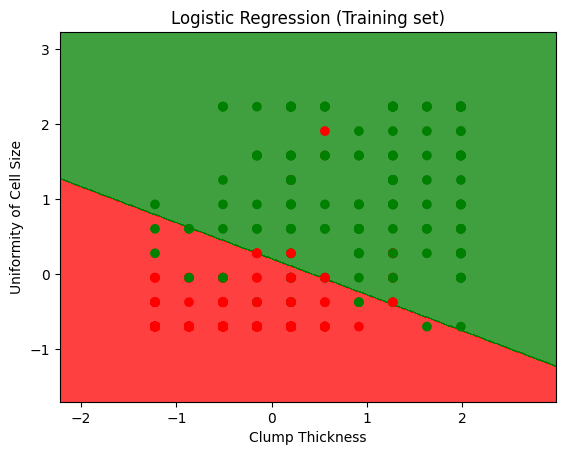

In [105]:
# Features for visualization: Clump Thickness and Uniformity of Cell Size
X_vis = X[:, [0, 1]]

# Split for training set visualization
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.2, random_state=0
)

# Feature scaling
scaler_vis = StandardScaler()
X_train_vis_scaled = scaler_vis.fit_transform(X_train_vis)

# Train classifier on training set (2 features)
classifier_vis = LogisticRegression(random_state=0)
classifier_vis.fit(X_train_vis_scaled, y_train_vis)

# Create mesh grid
X1, X2 = np.meshgrid(
    np.arange(start=X_train_vis_scaled[:, 0].min() - 1,
              stop=X_train_vis_scaled[:, 0].max() + 1,
              step=0.01),
    np.arange(start=X_train_vis_scaled[:, 1].min() - 1,
              stop=X_train_vis_scaled[:, 1].max() + 1,
              step=0.01)
)

# Plot decision boundary
plt.contourf(
    X1, X2,
    classifier_vis.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(('red', 'green'))
)

# Plot training points
plt.scatter(
    X_train_vis_scaled[:, 0],
    X_train_vis_scaled[:, 1],
    c=y_train_vis,
    cmap=ListedColormap(('red', 'green'))
)

plt.title("Logistic Regression (Training set)")
plt.xlabel("Clump Thickness")
plt.ylabel("Uniformity of Cell Size")
plt.show()

##Decision Boundary – Test Set Visualization

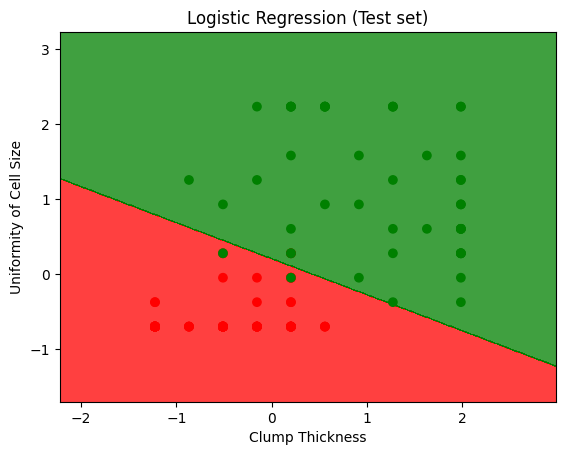

In [106]:
# Scale test set using the same scaler
X_test_vis_scaled = scaler_vis.transform(X_test_vis)

# Plot decision boundary for test set
plt.contourf(
    X1, X2,
    classifier_vis.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(('red', 'green'))
)

# Plot test points
plt.scatter(
    X_test_vis_scaled[:, 0],
    X_test_vis_scaled[:, 1],
    c=y_test_vis,
    cmap=ListedColormap(('red', 'green'))
)

plt.title("Logistic Regression (Test set)")
plt.xlabel("Clump Thickness")
plt.ylabel("Uniformity of Cell Size")
plt.show()